In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt

# Import all the actual code, this takes a while.
from functions import *

<h1>Guide</h1> <br>
<br>
<big>This notebook no longer has code in it.  Instead, use this for searching through data.</big><br>
<big>To see the actual code, see functions.py</big><br>
<br>
Useful functions (detailed explanations and examples below): <br>
urban_slice(df,target_state, high, low) <br>
total_graph(df, area)<br>
age_graph((df, area, threshold)<br>
avg_age_graph(df, area)<br>
<br>
You can pass functions in other functions(examples below below)<br>
<br>
You can use any function with any state's dataframe, using stateabbreviation_df (e.g. co_df for Colorado)<br>
<br>
You can also iterate through groups of states.  The current groups are: <br>
<br>
All states where cannabis is currently illegal: <br>
state_dict1<br>
state_dict2<br>
state_dict3 <br>
(Jupyter Notebook will only generate ~20 plots at a time, so I had to arbitrarily split them up)<br>
<br>
States that legalized in 2012:<br>
state_dict_2012<br>
<br>
States that legalized in 2014:<br>
state_dict_2014<br>
<br>
States that legalized in 2016:<br>
state_dict_2016<br>
<br>
And states that are expected to legalize in 2018: <br>
state_dict_2018<br>
<br>
The keys in each of these dictionaries are the name of the state ('Colorado') and the values are the dataframes (co_df)

<big><big><b> Functions: </b></big></big>

<big>Function:  urban_slice </big><br>
Return a slice of the state dataframe only containing counties with a certain "urban percentage".

arguments:  (df, target_state, high, low) <br>
df           =   Name of state's dataframe (e.g. co_df for colorado, ak_df for alaska) <br>
target_state =   State name in the form of a string (e.g. 'Colorado', 'Alaska') <br>
high         =   Upper-boundary of "urban percentage"
low          =   Lower-boundary of "urban percentage"

In [ ]:
# Example
example = urban_slice(or_df, 'Oregon', 75, 50)
example.head()

<big><big>Function:  total_graph </big></big><br>
Generates a plot of total population over 2010-2016.  Not very useful unless used along with urban_slice.

arguments:  (df, area) <br>
df           =   Name of state's dataframe (e.g. co_df for colorado, ak_df for alaska) <br>
area         =   Name of the area.  This will only appear in the title of the plot and doesn't matter much

In [ ]:
# Example
total_graph(co_df, "'Rado, Dude")

In [ ]:
# Much better example
total_graph(urban_slice(co_df, 'Colorado', 40, 20), "the rural parts of 'Rado, Derd")

<big><big>Function:  age_graph </big></big><br>
Generate a plot of population change over 2010-2016, separated by age group.

arguments:  (df, area, threshold) <br>
df           =   Name of state's dataframe (e.g. co_df for colorado, ak_df for alaska) <br>
area         =   Same as the total_graph function. Just for the plot title, doesn't matter much. <br>
threshold    =   This allows you to limit how many lines are drawn on the plot.  If you only want to see lines where the change in population over the 6 years (positive or negative) is %20, you would input 20 here.

In [ ]:
# Example
age_graph(ak_df, 'Alaska', 15)

<big><big>Function:  avg_age_graph </big></big><br>
Generate a plot of average age over 2010-2016.

arguments:  (df, area) <br>
df           =   Name of state's dataframe (e.g. co_df for colorado, ak_df for alaska) <br>


In [ ]:
# Example
avg_age_graph(urban_slice(wa_df, 'Washington', 50, 25))

In [ ]:
# Iteration example
for key in state_dict1:
    high = 20
    low = 10
    try:
        total_graph(urban_slice(state_dict1[key], key, high, low), f"{key} in counties with urban percentage between {low} and {high} ")
    except:
        print(f'Error with {key}')

In [ ]:
for key in state_dict1:
    try:
        high = 100
        low = 90
        age_graph(urban_slice(state_dict1[key], key, high, low), key, 15)
    except:
        print(f'error with {key}')

Colorado
Washington
[[14782, 14543, 14147, 14254, 14461, 14580, 15008], [12963, 12931, 12993, 12892, 12930, 13066, 13123]]
[[12963], [12931], [12993], [12892], [12930], [13066], [13123]]


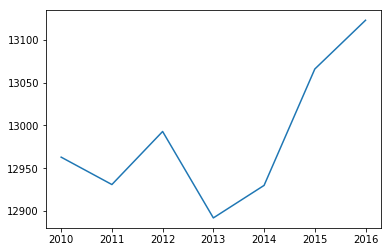

In [24]:
# THIS IS SOMETHING I'M WORKING ON, IT'S GOING OK.  
# IF ANYONE CAN FIGURE OUT WHY IT ONLY WORKS WITH STATE_DICT_2012 THAT WOULD BE DOPE

def avg_age_from_dict(dictionary, high, low):
    
    age_list = []
    avg_age = []
    
    for key in dictionary:
        
        try:
            df = urban_slice(dictionary[key], key, high, low)
            tot = df.loc[df['AGEGRP'] == 0, ]
            tot_group_year = tot.groupby('YEAR')
            tot_group_year = tot_group_year.sum()
            tot_group_year.reset_index(inplace=True)
            print(key)

        
            tot_year = tot_group_year['TOT_POP'].values.tolist()
            age_list.append(tot_year)
            
        except:
             pass       
        
    print(age_list)
    for i in range(len(age_list[0])):
            
        for j in range(len(age_list)):
            loop_list = []
            loop_list.append(age_list[j][i])
                
        loop_avg = sum(loop_list) / len(loop_list)
        avg_age.append(loop_list)
            
        
    plt.plot(['2010', '2011', '2012', '2013', '2014', '2015', '2016'], avg_age)
    print(avg_age)
        
        
        
avg_age_from_dict(state_dict_2012, 20, 10)

In [27]:
avg_age_from_dict(state_dict_2014, 30, 10)

Alaska
ValueError in DC
Oregon
[[72648, 73835, 74647, 74924, 75585, 75984, 76474], []]


IndexError: list index out of range